In [0]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
ls

ls: cannot access 'IMVAdata': Transport endpoint is not connected
drive/  IMVAdata/  log/  sample_data/


In [0]:
TRAIN_DIR = 'drive/My Drive/IMVAdata/train (1)'
TEST_DIR = 'drive/My Drive/IMVAdata/test2'
IMG_SIZE = 50
LR = 1e-4

MODEL_NAME = 'shirtvspant-{}-{}.model'.format(LR, '2conv-basic')

In [0]:
def label_img(img):
    word_label = img.split('.')[-3]
    if word_label == 'shirt': return [1,0]
    elif word_label == 'pant': return [0,1]

In [0]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
        training_data.append([np.array(img), np.array(label)])
    shuffle(training_data)
    #np.save('train_data.npy', training_data)
    return training_data

In [0]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE), (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), img_num])

    #np.save('test_data.npy',testing_data)
    return testing_data

In [0]:
train_data = create_train_data()

100%|██████████| 82/82 [00:01<00:00, 49.26it/s]


In [0]:
print(train_data)

[[array([[252, 240, 255, ..., 187, 190, 182],
       [247, 255, 255, ..., 255, 250, 181],
       [255, 253, 255, ..., 255, 255, 255],
       ...,
       [251, 249, 250, ..., 253, 255, 255],
       [250, 251, 249, ..., 251, 253, 250],
       [250, 251, 250, ..., 246, 253, 253]], dtype=uint8), array([1, 0])], [array([[ 73,  99, 116, ..., 159, 149,  80],
       [ 77,  86, 116, ..., 165, 109,  97],
       [ 79, 103, 110, ..., 111, 146,  69],
       ...,
       [123, 118, 122, ..., 142, 133, 143],
       [116, 113, 114, ..., 140, 149, 145],
       [ 53,  59,  64, ..., 135, 128, 117]], dtype=uint8), array([1, 0])], [array([[117, 106, 199, ..., 204, 231, 234],
       [198, 201, 212, ..., 234, 235, 231],
       [202, 169, 186, ..., 239, 223, 198],
       ...,
       [202, 143, 127, ..., 211, 201, 206],
       [174, 203, 193, ..., 208, 200, 200],
       [196, 198, 197, ..., 139, 194, 203]], dtype=uint8), array([1, 0])], [array([[172, 171, 149, ..., 127, 141, 155],
       [155, 157, 163, ..., 12

In [0]:
import tensorflow as tf
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression


tf.reset_default_graph()

In [0]:
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

In [0]:
train = train_data[:-10]
test = train_data[-10:]
print(train)
print(test)

[[array([[252, 240, 255, ..., 187, 190, 182],
       [247, 255, 255, ..., 255, 250, 181],
       [255, 253, 255, ..., 255, 255, 255],
       ...,
       [251, 249, 250, ..., 253, 255, 255],
       [250, 251, 249, ..., 251, 253, 250],
       [250, 251, 250, ..., 246, 253, 253]], dtype=uint8), array([1, 0])], [array([[ 73,  99, 116, ..., 159, 149,  80],
       [ 77,  86, 116, ..., 165, 109,  97],
       [ 79, 103, 110, ..., 111, 146,  69],
       ...,
       [123, 118, 122, ..., 142, 133, 143],
       [116, 113, 114, ..., 140, 149, 145],
       [ 53,  59,  64, ..., 135, 128, 117]], dtype=uint8), array([1, 0])], [array([[117, 106, 199, ..., 204, 231, 234],
       [198, 201, 212, ..., 234, 235, 231],
       [202, 169, 186, ..., 239, 223, 198],
       ...,
       [202, 143, 127, ..., 211, 201, 206],
       [174, 203, 193, ..., 208, 200, 200],
       [196, 198, 197, ..., 139, 194, 203]], dtype=uint8), array([1, 0])], [array([[172, 171, 149, ..., 127, 141, 155],
       [155, 157, 163, ..., 12

In [0]:
X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = [i[1] for i in train]

In [0]:
test_x = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_y = [i[1] for i in test]

In [0]:
model.fit({'input': X}, {'targets': Y}, n_epoch=100, validation_set=({'input': test_x}, {'targets': test_y}), snapshot_step=500, show_metric=True, run_id=MODEL_NAME)


Training Step: 199  | total loss: 0.69041 | time: 0.223s
| Adam | epoch: 100 | loss: 0.69041 - acc: 0.9121 -- iter: 64/72
Training Step: 200  | total loss: 0.62300 | time: 1.265s
| Adam | epoch: 100 | loss: 0.62300 - acc: 0.9209 | val_loss: 0.11629 - val_acc: 0.9000 -- iter: 72/72
--


100%|██████████| 32/32 [00:01<00:00, 18.99it/s]


[0.07674915 0.9232508 ]
[0.870355   0.12964498]
[0.9863399  0.01366003]
[0.99477506 0.00522496]
[0.9852254 0.0147746]
[0.99841285 0.00158717]
[9.9999785e-01 2.2033030e-06]
[0.7291029 0.2708971]
[0.9839872  0.01601285]
[0.6296463 0.3703537]
[9.9986148e-01 1.3855605e-04]
[9.993894e-01 6.105435e-04]
[9.994618e-01 5.382285e-04]
[0.99822706 0.00177292]
[5.594792e-04 9.994405e-01]
[0.00244189 0.9975581 ]
[0.12119767 0.87880236]
[0.00256124 0.9974388 ]
[0.01916012 0.9808399 ]
[9.3655987e-04 9.9906343e-01]
[9.9998653e-01 1.3450149e-05]
[0.99764544 0.00235455]
[0.9556461  0.04435393]
[9.9953318e-01 4.6678685e-04]
[9.9976677e-01 2.3327794e-04]
[0.00190593 0.998094  ]
[0.01090158 0.9890984 ]
[0.22650157 0.7734985 ]
[0.00121543 0.9987846 ]
[0.00694869 0.9930513 ]
[9.9998367e-01 1.6362063e-05]
[9.9987388e-01 1.2607938e-04]


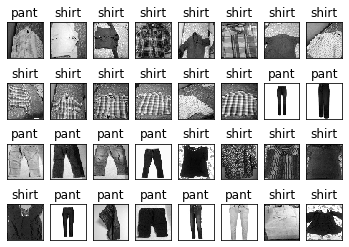

0.96875


In [0]:
import matplotlib.pyplot as plt
 
test_data = process_test_data()
#print(test_data)
 

fig = plt.figure()
count=0
for num, data in enumerate(test_data[:32]):
    img_num = data[1]
    img_data = data[0]

    y = fig.add_subplot(4,8,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)

    model_out = model.predict([data])[0]
    print(model_out)
    if np.argmax(model_out) == 1: 
      str_label='pant'
      if(img_num=='pant'):
        count=count+1
    else: 
      str_label = 'shirt'
      if(img_num=='shirt'):
        count=count+1
    
    
    y.imshow(orig, cmap='gray')
    plt.title(str_label)
    plt.subplots_adjust(hspace=0.7)
    
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()
print(count/32 )


In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=1)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a shirt")
  else:
    print(fn + " is a pant")
 